In [2]:
import pickle
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Generating a feature family where x ~ N(0,1), ε ~ N(0,1/25), and y = xβ + ε

In [44]:
x = np.zeros((50,500))
x_test = np.zeros((1500,500))

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
#         x[i,j] = np.random.normal(0,1,1)
#         x[i,j] = np.random.poisson(lam = 4,size = 1)
#         x[i,j] = np.random.rayleigh(scale = 3,size = 1)
        x[i,j] = i + j

for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]):
#         x_test[i,j] = np.random.normal(0,1,1)
#         x_test[i,j] = np.random.poisson(lam = 4,size = 1)
#         x_test[i,j] = np.random.rayleigh(scale = 3,size = 1)
        x_test[i,j] = i + j

noise = np.random.normal(0, 1/25, x.shape[0])

noise_test = np.random.normal(0, 1/25, x_test.shape[0])

# beta = np.random.normal(0,1,x.shape[1])

# beta = abs(beta)

# beta = (beta/np.sqrt(np.sum(beta**2)))

beta = np.zeros(x.shape[1])

beta = np.transpose(beta)

# y = np.matmul(x,beta) + noise
y = np.matmul(x,beta)
y = y.reshape((y.size,1))

print(y)

print(beta.shape)
print(x_test.shape)
# y_test = np.matmul(x_test,beta) + noise_test
y_test = np.matmul(x_test,beta)

y_test = y_test.reshape((y_test.size,1))
print(y_test.shape)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(500,)
(1500, 500)
(1500, 1)


## Getting the actual accuracy using the random selection of features and fitting a linear regression model using those features

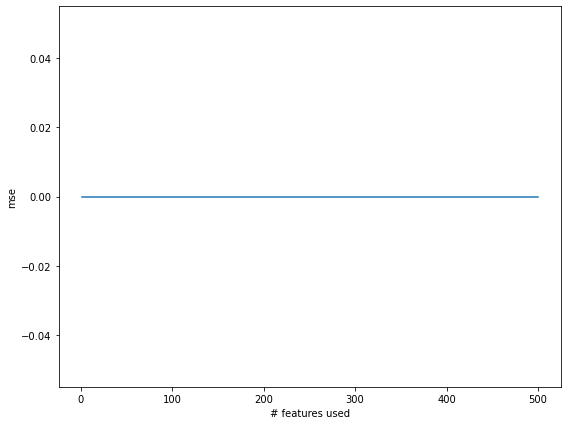

In [45]:
test_accuracy  = np.zeros(x.shape[1])

coeff_list_max = list()
coeff_list_min = list()

unif_lists = list()

for j in range(1,x.shape[1] + 1):
    
    # selecting the random features
    if(j < x.shape[1]):
        unif_list = np.random.choice(x.shape[1] -1,size = j,replace = False)
        unif_list.sort()
    else:
        unif_list = np.linspace(1,100,100)
        unif_list -=1
        unif_list = unif_list.astype(int)
        
#     print(unif_list)
    
    temp_x = x[:,unif_list]
    
    unif_lists.append(set(unif_list))

    # fitting the model with the randomly selected features
    lm = LinearRegression().fit(temp_x,y)
    
    # getting the coefficient of the lm model
    beta_temp = lm.coef_
    beta_temp = beta_temp.reshape(beta_temp.size,1)
    beta_temp = beta_temp.astype(float)
    
    (lm.coef_).sort()
    
    
    coeff_list_max.append(lm.coef_[0,-1])
    coeff_list_min.append(lm.coef_[0,0])
    
    beta = np.zeros((x.shape[1],1))
    counter = 0
    for i in range(x.shape[1]):
        if(i in unif_list):
            beta[i] = beta_temp[counter]
            counter+= 1
        else:
            beta[i] = 0
    
#     print("This is the counter " + str(counter))
    pred = np.matmul(x_test,beta)
    pred = pred.reshape(pred.size,1)
    
    test_accuracy[j-1] = mean_squared_error(pred,y_test)
    
#     print("This is the test accuracy using " + str(j) + " uniformly distributed "  + str(test_accuracy[j-1]))

    
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = (test_accuracy))
plt.xlabel("# features used")
plt.ylabel("mse")
plt.show()
    

## Plotting how the highest coefficient in the min norm solution evolves

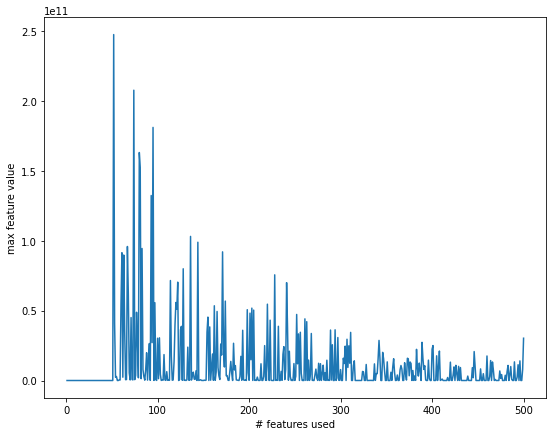

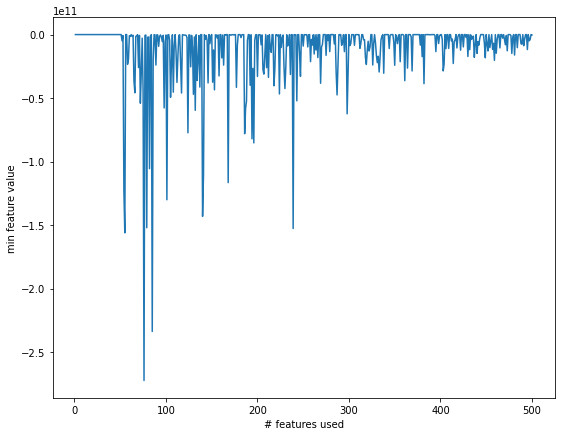

In [43]:
# print(coeff_list)
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = coeff_list_max)
plt.xlabel("# features used")
plt.ylabel("max feature value")
plt.show()
    
    
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = coeff_list_min)
plt.xlabel("# features used")
plt.ylabel("min feature value")
plt.show()

## Graphing the Risk Curve for HSU which is the theorem 1 curve under the selection of uniformly random features that are selected

In [17]:
risk_curve = list()

list_of_indices = np.linspace(1,100,100)
list_of_indices -=1
list_of_indices = list_of_indices.astype(int)
set_of_indices = set(list_of_indices)

for i in range(x.shape[1]):
    opp_list = list(set_of_indices - set(unif_lists[i]))
    
    beta_tc_norm = np.sum((beta[opp_list]**2))
    beta_t_norm = np.sum(beta[list(unif_lists[i])]**2)
    
#     print(beta_tc_norm)
#     print(beta_t_norm)
    
    if(i <= x.shape[0] - 2):
        risk_curve.append((beta_tc_norm + 1/25)*(1 + (i/(x.shape[0] -i -1))))

    elif( i <=  x.shape[0]+1 and i >=  x.shape[0]-1):
        risk_curve.append(5000)
        
    else:
        print(i)
        print(x.shape[0])
        first_el = (beta_t_norm)*(1 - (x.shape[0]/i))
        second_el = (beta_tc_norm + 1/25)*(1 + (x.shape[0]/(i - x.shape[0] -1)))
#         print("first el " + str(first_el))
#         print("second el "  + str(second_el))
        risk_curve.append(first_el + second_el)
        
    
print(risk_curve)

52
50
53
50
54
50
55
50
56
50
57
50
58
50
59
50
60
50
61
50
62
50
63
50
64
50
65
50
66
50
67
50
68
50
69
50
70
50
71
50
72
50
73
50
74
50
75
50
76
50
77
50
78
50
79
50
80
50
81
50
82
50
83
50
84
50
85
50
86
50
87
50
88
50
89
50
90
50
91
50
92
50
93
50
94
50
95
50
96
50
97
50
98
50
99
50
100
50
101
50
102
50
103
50
104
50
105
50
106
50
107
50
108
50
109
50
110
50
111
50
112
50
113
50
114
50
115
50
116
50
117
50
118
50
119
50
120
50
121
50
122
50
123
50
124
50
125
50
126
50
127
50
128
50
129
50
130
50
131
50
132
50
133
50
134
50
135
50
136
50
137
50
138
50
139
50
140
50
141
50
142
50
143
50
144
50
145
50
146
50
147
50
148
50
149
50
150
50
151
50
152
50
153
50
154
50
155
50
156
50
157
50
158
50
159
50
160
50
161
50
162
50
163
50
164
50
165
50
166
50
167
50
168
50
169
50
170
50
171
50
172
50
173
50
174
50
175
50
176
50
177
50
178
50
179
50
180
50
181
50
182
50
183
50
184
50
185
50
186
50
187
50
188
50
189
50
190
50
191
50
192
50
193
50
194
50
195
50
196
50
197
50
198
50
199
50
200
50
201
5

   features  test_curve  theoretical_curve
0       1.0    8.413796          -0.003795
1       2.0    8.434233           0.016824
2       3.0    8.459754           0.037877
3       4.0    8.380252           0.046022
4       5.0    8.352646           0.071327


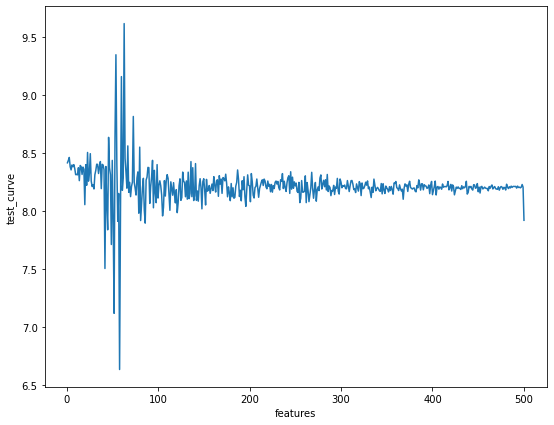

In [22]:
df = pd.DataFrame(data = np.transpose(np.array([np.linspace(1,x.shape[1],x.shape[1]), np.log(test_accuracy),np.log(risk_curve)])),
                 columns = ["features","test_curve","theoretical_curve"])

print(df.head())
plt.figure(figsize = (9,7))
# sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = np.log(test_accuracy))
# sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = np.log(risk_curve))
sns.lineplot(data = df, x= "features", y = "test_curve")
# sns.lineplot(data = df, x= "features", y = "theoretical_curve")
plt.show()